# Equation for Calculating Skin Depth

$$\delta = \sqrt{\frac{\rho}{\pi f \mu_{r} \mu_{o}}}$$

Where:
$\delta$ skin depth

$\rho$ resistivity, 1.72 x 10-6 Ω × m for annealed copper

$f$  signal frequency

$\mu_{r}$ relative permeability, 0.999991 for copper

$\mu_{o}$ permeability of free space = 4π x 10-7

## AWG chart
|AWG|mm^2|
|---|----|
|30	|0.05|
|28	|0.08|
|26	|0.14|
|24	|0.25|
|22	|0.34|
|21	|0.38|
|20	|0.50|
|18	|0.75|
|17	|1.0|
|16	|1.5|

## Wire resistance

$$R = \rho * L / A$$

Where:

R is the resistance in Ω

$\rho$ is the resistivity of material in Ω × m

L is the length of the wire

A is the cross-sectional area of the wire

## Normalized resistance ratio

$$\frac{R_{skin\_effect}}{R_{original}}= \frac{\rho * L / A_{skin\_effect}}{\rho * L / A_{original}} = \frac{A_{original}}{A_{skin\_effect}} = \frac{A_{original}}{\pi*R^2-\pi*(R-\delta)^2}$$

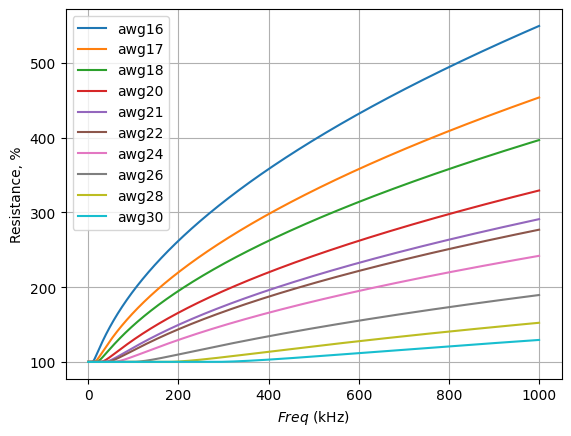

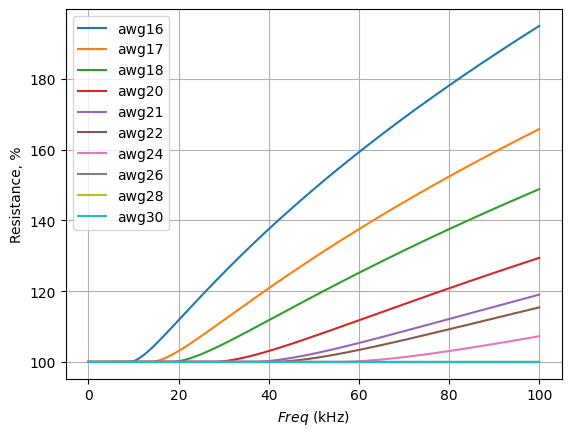

In [74]:
import matplotlib.pyplot as plt
import numpy

rho = 1.72e-8 # ohm
mur = 0.999991
mu0 = 4*numpy.pi*1e-7
# dictionary of wire gauge
awg = {}
awg[30]=0.05e-6
awg[28]=0.08e-6
awg[26]=0.14e-6
awg[24]=0.25e-6
awg[22]=0.34e-6
awg[21]=0.38e-6
awg[20]=0.50e-6
awg[18]=0.75e-6
awg[17]=1.0e-6
awg[16]=1.5e-6


def computeSkinDepth(f):
    return numpy.sqrt(rho/(numpy.pi * f * mur * mu0))

def computeReducedArea(f, area):
    depth = computeSkinDepth(f)
    radius = numpy.sqrt(area/numpy.pi)
    return numpy.where(radius <= depth, area, numpy.pi*radius**2-numpy.pi*(radius-depth)**2)

def computeRatio(awg, f):
    originalArea = numpy.repeat(awg, f.size);
    reducedArea = computeReducedArea(f, originalArea)
    return originalArea/reducedArea * 100

fr = numpy.linspace(1,1000e3,10000)


plt.figure()
for key in sorted(awg):
    plt.plot(fr/1000, computeRatio(awg[key], fr), label="awg"+str(key))

plt.ylabel("Resistance, %")
plt.xlabel("$Freq$ (kHz)")
plt.grid(True, which="both")
plt.rcParams['axes.formatter.min_exponent'] = 6
plt.legend()
plt.show()


fr = numpy.linspace(1,100e3,1000)
plt.figure()
for key in sorted(awg):
    plt.plot(fr/1000, computeRatio(awg[key], fr), label="awg"+str(key))

plt.ylabel("Resistance, %")
plt.xlabel("$Freq$ (kHz)")
plt.grid(True, which="both")
plt.rcParams['axes.formatter.min_exponent'] = 6
plt.legend()
plt.show()
